In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Rastrigin Func on (for tes ng, global minimum at 0)
def fitness_function(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

In [3]:
# Hyperparameters
POP_SIZE = 20
DIM = 2
ITERATIONS = 100
CLONE_RATE = 5
MUTATION_RATE = 0.1
REPLACEMENT_RATE = 0.2
X_BOUND = (-5.12, 5.12)

In [4]:
# Ini alize popula on
def initialize_population():
    return [np.random.uniform(X_BOUND[0], X_BOUND[1], DIM) for _ in range(POP_SIZE)]

In [5]:
# Muta on (Gaussian)
def mutate(solution, affinity):
    mutation_strength = MUTATION_RATE / (affinity + 1e-6)  # inverse to fitness
    return solution + np.random.normal(0, mutation_strength, size=len(solution))

In [6]:
# Main Clonal Selec on Algorithm
def clonal_selection():
    population = initialize_population()
    best_scores = []

    for iteration in range(ITERATIONS):
        # Evaluate fitness (lower is be er)
        fitness = np.array([fitness_function(sol) for sol in population])
        sorted_indices = np.argsort(fitness)
        population = [population[i] for i in sorted_indices]
        fitness = fitness[sorted_indices]

        best_scores.append(fitness[0])

        # Select top candidates
        n_select = int(POP_SIZE / 2)
        selected = population[:n_select]

        # Cloning and muta on
        clones = []
        for i, antibody in enumerate(selected):
            n_clones = int(CLONE_RATE * (1 - i / n_select)) + 1
            affinity = 1.0 / (fitness[i] + 1e-6)
            for _ in range(n_clones):
                clone = mutate(antibody, affinity)
                clone = np.clip(clone, X_BOUND[0], X_BOUND[1])
                clones.append(clone)
        # Evaluate all clones
        all_candidates = population + clones
        all_fitness = [fitness_function(c) for c in all_candidates]
        best_indices = np.argsort(all_fitness)[:POP_SIZE]
        population = [all_candidates[i] for i in best_indices]

        # Introduce diversity
        n_replace = int(REPLACEMENT_RATE * POP_SIZE)
        for i in range(1, n_replace + 1):
            population[-i] = np.random.uniform(X_BOUND[0], X_BOUND[1], DIM)

        print(f"Iteration {iteration+1}: Best fitness = {best_scores[-1]:.4f}")
    return population[0], best_scores

Iteration 1: Best fitness = 10.3158
Iteration 2: Best fitness = 10.3087
Iteration 3: Best fitness = 6.7580
Iteration 4: Best fitness = 6.7580
Iteration 5: Best fitness = 1.9896
Iteration 6: Best fitness = 1.9896
Iteration 7: Best fitness = 1.9896
Iteration 8: Best fitness = 1.1871
Iteration 9: Best fitness = 1.1871
Iteration 10: Best fitness = 1.0441
Iteration 11: Best fitness = 1.0441
Iteration 12: Best fitness = 1.0441
Iteration 13: Best fitness = 1.0441
Iteration 14: Best fitness = 1.0084
Iteration 15: Best fitness = 1.0084
Iteration 16: Best fitness = 1.0084
Iteration 17: Best fitness = 1.0084
Iteration 18: Best fitness = 0.9950
Iteration 19: Best fitness = 0.9950
Iteration 20: Best fitness = 0.9950
Iteration 21: Best fitness = 0.9950
Iteration 22: Best fitness = 0.9950
Iteration 23: Best fitness = 0.9950
Iteration 24: Best fitness = 0.9950
Iteration 25: Best fitness = 0.9950
Iteration 26: Best fitness = 0.9950
Iteration 27: Best fitness = 0.9950
Iteration 28: Best fitness = 0.9950

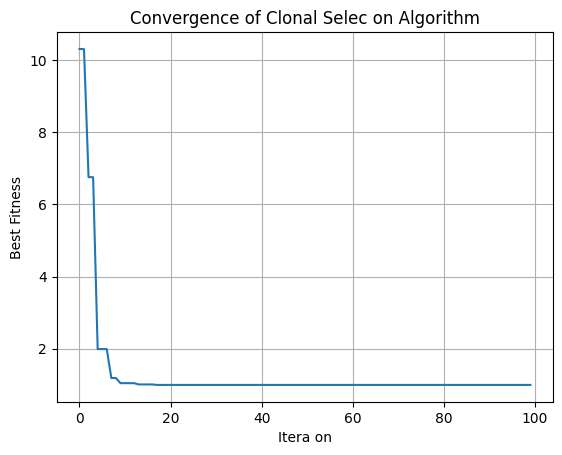

In [7]:
# Run
best_solution, history = clonal_selection()
print("\nBest solution:", best_solution)
print("Best fitness:", fitness_function(best_solution))

# Plot convergence
plt.plot(history)
plt.title("Convergence of Clonal Selec on Algorithm")
plt.xlabel("Itera on")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.show()